In [24]:
import pandas as pd
import datetime
import collections
import matplotlib.pyplot as plt
import matplotlib.style as style
df = pd.read_csv('UnitedAgainstJehad copy.csv', encoding='utf-8', engine='c')
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.options.display.max_colwidth = 100

In [25]:
df.shape

(46170, 17)

In [26]:
#get basic statistical info on the dataset
df.describe()

,tweet_id,favorite_count,retweet_count
count,4.617000e+04,46170.000000,46170.000000
mean,1.392733e+18,0.882933,136.162357
std,1.205169e+14,13.515272,192.217095
min,1.392494e+18,0.000000,0.000000
25%,1.392707e+18,0.000000,1.000000
50%,1.392716e+18,0.000000,26.000000
75%,1.392730e+18,0.000000,193.000000
max,1.394297e+18,1030.000000,728.000000


In [27]:
df.head(2)

,created_at,tweet_id,tweet_text,favorite_count,retweet_count,screen_name,name,account_creation_date,location,user_description,user_verified,original_tweet_text,original_tweet_user_screen_name,original_tweet_user_location,original_tweet_user_description,original_tweet_user_created_at,original_user_account_created_at
0,2021-05-17 14:20:11,1394296692934025224,@mirad_a_l Bengal mein hinduon ko Marte waqt Twitter app nahin tha shayad aap logon k paas tab k...,0,0,abhishek4mrkl,Aran,Tue May 01 03:57:48 +0000 2012,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-05-17 14:17:50,1394296104494125056,"#PalestineBleedsWorldSleeps\n\nThe first thing we do, let's kill all the coward Muslim Leaders.\...",2,0,MlrKamran,Mlr KaMrAN,Fri Apr 02 06:49:30 +0000 2021,Jammu And Kashmir,Happiness depends upon ourselves...!\nFrom:indian illegally occupied KASHMIR\nHeartbeat💖 PAKISTA...,False,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
df['created'] = pd.to_datetime(pd.to_datetime(df.created_at).apply(lambda x: x.strftime('%Y-%m-%d')))
df['month'] = pd.to_datetime(pd.to_datetime(df.created_at).apply(lambda x: x.strftime('%Y-%m')))

In [29]:
df.retweet_count.sum()

6286616

In [30]:
# groups and sums all the shares by day and then visualizes this data on a line graph
df.sort_values("created", ascending=False).tail()

,created_at,tweet_id,tweet_text,favorite_count,retweet_count,screen_name,name,account_creation_date,location,user_description,user_verified,original_tweet_text,original_tweet_user_screen_name,original_tweet_user_location,original_tweet_user_description,original_tweet_user_created_at,original_user_account_created_at,created,month
45178,2021-05-12 18:34:02,1392548640015536129,RT @cartoonistkid_: #UnitedAgainstJehad https://t.co/NQ8rLKseSm,0,61,devnagrihindi,हिंदी,Sun May 31 16:44:58 +0000 2020,भारत,हिंदी,False,#UnitedAgainstJehad https://t.co/NQ8rLKseSm,cartoonistkid_,India,"ना सरकार मेरी है,\nना रौब मेरा है, \nना बड़ा सा नाम मेरा है..\n मुझे तो एक छोटी सी बात का गर्व ह...",2021-05-12 17:18:40,2017-03-03 01:33:27,2021-05-12,2021-05-01
45177,2021-05-12 18:34:44,1392548816646070275,"RT @indianrightwing: SHARE THIS POST | TWITTER TREND: #UnitedAgainstJehad!! Be ready, tommorow 1...",0,280,SanchitSinghTo2,Nationalist_Doctor,Sun Mar 22 11:52:27 +0000 2020,NaN,MBBS STUDENT⚕⚕\nHEART AND SOUL BELONGS TO NATION\n🇮🇳🇮🇳🇮🇳🇮🇳🇮🇳🇮🇳🇮🇳🇮🇳🇮🇳🇮🇳🇮🇳🇮🇳🇮🇳🇮🇳\nVEER BHOGYA VASU...,False,"SHARE THIS POST | TWITTER TREND: #UnitedAgainstJehad!! Be ready, tommorow 11:00AM sharp.\n\nWe n...",indianrightwing,भारत,"Reality, That Can Give You Burns.. 🙏🏻🧡🇮🇳🚩",2021-05-12 15:02:32,2018-09-30 03:02:35,2021-05-12,2021-05-01
45176,2021-05-12 18:35:00,1392548881918046211,RT @cartoonistkid_: #UnitedAgainstJehad https://t.co/NQ8rLKseSm,0,61,RishitS9491,Rishit Shah AgniVeer🔥🚩,Wed Mar 25 13:10:50 +0000 2020,NaN,NaN,False,#UnitedAgainstJehad https://t.co/NQ8rLKseSm,cartoonistkid_,India,"ना सरकार मेरी है,\nना रौब मेरा है, \nना बड़ा सा नाम मेरा है..\n मुझे तो एक छोटी सी बात का गर्व ह...",2021-05-12 17:18:40,2017-03-03 01:33:27,2021-05-12,2021-05-01
45175,2021-05-12 18:35:30,1392549008267104256,RT @Priyanka_P_27: Tomorrow Trend\n#UnitedAgainstJehad\n\nEveryone atleast 20 Tweets\n\nHo Payeg...,0,238,priyabratadas,Priyabrata Das,Thu Jun 04 03:30:58 +0000 2009,"Pune, India","Simple & Down to Earth, Indian, Patriotic, Proud Hindu",False,Tomorrow Trend\n#UnitedAgainstJehad\n\nEveryone atleast 20 Tweets\n\nHo Payega ?\n#Israel #India...,Priyanka_P_27,"Pune, India",Engineering Student... \nNature Lover...\nBhartiya 🚩,2021-05-12 17:17:23,2021-05-01 12:38:23,2021-05-12,2021-05-01
46169,2021-05-12 14:57:08,1392494055813091330,"TWITTER TREND: #UnitedAgainstJehad\n\n Be ready, tommorow 11:00AM sharp.\n\nWe need you all to g...",833,632,randm_indianguy,The Random Indian,Thu Oct 17 09:05:06 +0000 2019,NaN,"Political analyst ,\nHardcore nationalist 🇮🇳 ,\nPrudent follower of Sanatan Dharma 🚩",False,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-12,2021-05-01


In [33]:
# get the most shared posts from the dataset
com_posts = df[['screen_name', 'tweet_text','tweet_id', 'created', 'retweet_count', 'user_verified','favorite_count', 'location']].value_counts(['tweet_text'])
com_posts.head(10)
#.to_csv('most_common.csv')

tweet_text                                                                                                                                       
RT @randm_indianguy: #UnitedAgainstJehad #UnitedAgainstJehad\n#UnitedAgainstJehad #UnitedAgainstJehad\n#UnitedAgainstJehad #UnitedAgainstJeha…       1457
#UnitedAgainstJehad                                                                                                                                   732
RT @indianrightwing: From Bangalore to Sweden, they leave no chances to spread violence. How can people live with these unsocial elements?…           689
RT @randm_indianguy: TWITTER TREND: #UnitedAgainstJehad\n\n Be ready, tommorow 11:00AM sharp.\n\nWe need you all to get this on top trending. I…      595
RT @randm_indianguy: Chronology : \n\nFirstly they will kill Kafirs on Ground \nThen they will play Victim Card on Social Media \nThey never sh…      565
RT @randm_indianguy: These are the Verses which Completely expose the So Called Peac

In [34]:
# get the most shared posts from the dataset
top_posts = df[['screen_name', 'tweet_text','tweet_id', 'created', 'retweet_count', 'favorite_count', 'location']].drop_duplicates(['tweet_text'], keep='first')
top_posts.sort_values(by='retweet_count', ascending=False).head(200)
#.to_csv('top_retweeted.csv')

,screen_name,tweet_text,tweet_id,created,retweet_count,favorite_count,location
34261,indianrightwing,"From Bangalore to Sweden, they leave no chances to spread violence. How can people live with the...",1392707228453408776,2021-05-13,728,1030,भारत
318,tuli_ishita,"RT @indianrightwing: From Bangalore to Sweden, they leave no chances to spread violence. How can...",1393463377528180739,2021-05-15,728,0,NaN
46169,randm_indianguy,"TWITTER TREND: #UnitedAgainstJehad\n\n Be ready, tommorow 11:00AM sharp.\n\nWe need you all to g...",1392494055813091330,2021-05-12,632,833,NaN
200,Foppa_Foppa,"RT @randm_indianguy: TWITTER TREND: #UnitedAgainstJehad\n\n Be ready, tommorow 11:00AM sharp.\n\...",1393709686067716096,2021-05-15,632,0,Sverige
37866,randm_indianguy,Chronology : \n\nFirstly they will kill Kafirs on Ground \nThen they will play Victim Card on So...,1392704250665312258,2021-05-13,593,543,NaN
426,VPUP65,RT @randm_indianguy: Chronology : \n\nFirstly they will kill Kafirs on Ground \nThen they will p...,1393388396790181888,2021-05-15,593,0,"वाराणसी, भारत"
167,dearestamma,RT @randm_indianguy: These are the Verses which Completely expose the So Called Peaceful Mazhub ...,1393804323767799808,2021-05-16,580,0,"Bhopal, India"
36977,randm_indianguy,These are the Verses which Completely expose the So Called Peaceful Mazhub \n\nRetweet it maximu...,1392704886488195080,2021-05-13,580,589,NaN
105,Faizal26742538,RT @randm_indianguy: Islamic Jihad is more deadly Virus than Coronavirus \n\nRetweet if you agre...,1394016875126804480,2021-05-16,528,0,NaN
35747,randm_indianguy,Islamic Jihad is more deadly Virus than Coronavirus \n\nRetweet if you agree ! \n\n#UnitedAgains...,1392705890722013184,2021-05-13,528,500,NaN


In [35]:
df['screen_name'].value_counts().head(30)

Shubham06796302    734
thapasvims         335
143BJP             276
Niteshwar15        272
Aradhya3030        260
PJain777           253
RupeshVasava12     250
Arush06574622      233
HeyDude25412542    233
BhojwaniLove       223
SK57845871         216
bhargav01680254    215
pawar779           215
RohitSo65432284    196
Om58628167         190
Rkforu2            188
PavanPatil28       187
Aman_a_kumar1      182
Chandan39276026    181
lupesh_netam       179
lakshaykaushik3    174
dharmic111         164
Vishalt00046419    162
PatelBeejaram      158
VidyaNa65761958    158
Sangamesh304       157
SANDEEPSINGHMU9    155
Meghraj19449029    151
VivekSa93106465    147
hitakchhabra       143
Name: screen_name, dtype: int64

In [36]:
df['created_at'] = pd.to_datetime(df['created_at'])
df['account_creation_date'] = pd.to_datetime(df['account_creation_date'])
df.dtypes

created_at                               datetime64[ns]
tweet_id                                          int64
tweet_text                                       object
favorite_count                                    int64
retweet_count                                     int64
screen_name                                      object
name                                             object
account_creation_date               datetime64[ns, UTC]
location                                         object
user_description                                 object
user_verified                                      bool
original_tweet_text                              object
original_tweet_user_screen_name                  object
original_tweet_user_location                     object
original_tweet_user_description                  object
original_tweet_user_created_at                   object
original_user_account_created_at                 object
created                                  datetim

In [37]:
# get individual accounts in the dataset
accounts = df.copy()
accounts = accounts.drop_duplicates(['screen_name'], keep='first')
accounts['account_creation_date'] = pd.to_datetime(accounts['account_creation_date'])

In [38]:
#see how many unique accounts are in the dataset
accounts.shape[0]

5958

In [39]:
#FILTERED BY INDIVIDUALS: see when the accounts were created to see if there is anything fishy
# changing the time stamp for account creation date to month
accounts['account_creation_date'] = (pd.to_datetime(pd.to_datetime(accounts.account_creation_date).apply(lambda x: x.strftime('%Y-%m-%d'))))
accounts['account_creation_date_month'] = (pd.to_datetime(pd.to_datetime(accounts.account_creation_date).apply(lambda x: x.strftime('%Y-%m'))))
#see when the accounts were created to see if there is anything fishy
accounts.account_creation_date_month.value_counts().head(20)
#.plot(kind='line',x='account_creation_date_month',y='number', color ='black')
#plt.savefig('myplot.svg')


2021-05-01    634
2020-05-01    273
2021-03-01    253
2021-04-01    240
2020-04-01    222
2020-08-01    206
2020-09-01    189
2020-07-01    167
2020-06-01    167
2021-02-01    166
2021-01-01    159
2020-10-01    150
2020-03-01    141
2020-12-01    136
2020-11-01    124
2020-02-01     92
2019-12-01     90
2020-01-01     86
2019-11-01     69
2019-03-01     64
Name: account_creation_date_month, dtype: int64

In [40]:
#see when the accounts were created to see if there is anything fishy
# changing the time stamp for account creation date to month
df['account_creation_date'] = (pd.to_datetime(pd.to_datetime(df.account_creation_date).apply(lambda x: x.strftime('%Y-%m-%d'))))
df['account_creation_date_month'] = (pd.to_datetime(pd.to_datetime(df.account_creation_date).apply(lambda x: x.strftime('%Y-%m'))))
#see when the accounts were created to see if there is anything fishy
df.account_creation_date_month.value_counts().head(10)

2021-05-01    8548
2020-08-01    2195
2020-09-01    2172
2021-03-01    2107
2021-02-01    1976
2020-05-01    1933
2021-04-01    1899
2020-10-01    1870
2020-04-01    1814
2020-12-01    1367
Name: account_creation_date_month, dtype: int64

In [41]:
start_date = '2021-05-01'
end_date = '2021-03-01'

In [42]:
mask = (df['account_creation_date_month'] >= end_date) & (df['account_creation_date_month'] <= start_date)

In [43]:
df1 = df.loc[mask]
df1.shape

(12554, 20)

In [44]:
df1.head(2)

,created_at,tweet_id,tweet_text,favorite_count,retweet_count,screen_name,name,account_creation_date,location,user_description,user_verified,original_tweet_text,original_tweet_user_screen_name,original_tweet_user_location,original_tweet_user_description,original_tweet_user_created_at,original_user_account_created_at,created,month,account_creation_date_month
1,2021-05-17 14:17:50,1394296104494125056,"#PalestineBleedsWorldSleeps\n\nThe first thing we do, let's kill all the coward Muslim Leaders.\...",2,0,MlrKamran,Mlr KaMrAN,2021-04-02,Jammu And Kashmir,Happiness depends upon ourselves...!\nFrom:indian illegally occupied KASHMIR\nHeartbeat💖 PAKISTA...,False,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-17,2021-05-01,2021-04-01
7,2021-05-17 13:31:47,1394284516185821186,"RT @dhawaldudhaiya: #IslamophobiaAfter the #Violence, when you bring their fluffy face to everyo...",0,9,Spartan16622383,Spartan,2021-05-15,NaN,patriot,False,"#IslamophobiaAfter the #Violence, when you bring their fluffy face to everyone, then these peopl...",dhawaldudhaiya,"Indore, India",स्वयंसेवक- @RSSorg\nपुर्व केम्पस ऐम्बेसेडर(CCPS&SCPS) @BJYM -ईन्दोर |\nसदस्य हिंदू युवा वाहिनी-M...,2021-05-17 10:53:50,2020-04-08 07:26:38,2021-05-17,2021-05-01,2021-05-01


In [45]:
df1.screen_name.value_counts().head(30)

Shubham06796302    734
RupeshVasava12     250
HeyDude25412542    233
Arush06574622      233
VidyaNa65761958    158
VivekSa93106465    147
SomeAwwww          126
sanataniz_         126
RandomI61242221    125
DeepakC00498352    119
sanatani_girl23    118
mukur_prabha       118
KaranSi62644697    117
Pranavb10428251    108
HemantK73374412    103
NakulCh55451765    100
HarshSh77956754     98
Rishabh77486852     96
Hindutvaaaa         95
guy_sanatani        91
AkashTo66426484     90
Jehad_ka_kaal       88
kattarhindu125c     86
TheRightvoice8      85
Rama51494259        83
Shivam92077383      80
MrVivek_Pandey      80
mukur_pallavi       80
Suryans59644288     79
ra06222174          77
Name: screen_name, dtype: int64

<AxesSubplot:>

/usr/local/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 2349 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 2366 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 2352 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 2340 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 2349 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:203: RuntimeWarning: Glyph 2366 missing from current font.
  font.set_text(s, 

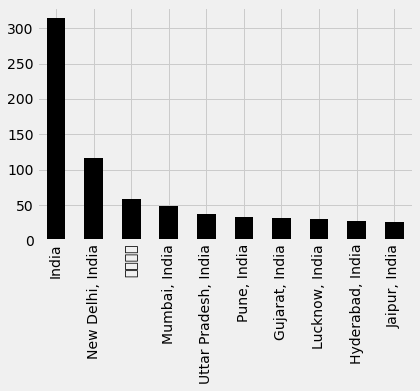

In [46]:
accounts['location'].value_counts().head(10).plot(kind='bar',x='place',y='number', color ='black')

In [47]:
import re
df['hashtags_user_descriptions'] = df['user_description'].apply(lambda x: str(re.findall(r"#(\w+)", str(x))))
df['hashtags_user_descriptions'] = df['hashtags_user_descriptions'].apply(lambda x: ast.literal_eval(x))
type(df.iloc[0].hashtags_user_descriptions)

list

In [48]:
df['hashtags_user_descriptions'] = [str(i).lower() for i in df['hashtags_user_descriptions']]
df.head(5)

,created_at,tweet_id,tweet_text,favorite_count,retweet_count,screen_name,name,account_creation_date,location,user_description,user_verified,original_tweet_text,original_tweet_user_screen_name,original_tweet_user_location,original_tweet_user_description,original_tweet_user_created_at,original_user_account_created_at,created,month,account_creation_date_month,hashtags_user_descriptions
0,2021-05-17 14:20:11,1394296692934025224,@mirad_a_l Bengal mein hinduon ko Marte waqt Twitter app nahin tha shayad aap logon k paas tab k...,0,0,abhishek4mrkl,Aran,2012-05-01,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-17,2021-05-01,2012-05-01,[]
1,2021-05-17 14:17:50,1394296104494125056,"#PalestineBleedsWorldSleeps\n\nThe first thing we do, let's kill all the coward Muslim Leaders.\...",2,0,MlrKamran,Mlr KaMrAN,2021-04-02,Jammu And Kashmir,Happiness depends upon ourselves...!\nFrom:indian illegally occupied KASHMIR\nHeartbeat💖 PAKISTA...,False,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-17,2021-05-01,2021-04-01,[]
2,2021-05-17 14:14:24,1394295240161259520,RT @Srushti53013875: #IndiaStandWithIsrael 🇮🇳❤🇮🇱Israel is facing same as India is facing #United...,0,12,dsnhnui,DS,2011-02-16,भारत,"I want corruption free INDIA, Justice, Uniform Law for all, Population Control.",False,#IndiaStandWithIsrael 🇮🇳❤🇮🇱Israel is facing same as India is facing #UnitedAgainstJehad #ISuppor...,Srushti53013875,"Maharashtra,India",Sanatan Dharm 🕉🕉\nधर्मो रक्षति रक्षितः 🚩🚩\nBharat Mata Ki Jai 🇮🇳🇮🇳\n#BeingHindu💪♥️💪 \nMarathi 😎\...,2021-05-13 09:50:25,2020-07-29 06:33:08,2021-05-17,2021-05-01,2011-02-01,[]
3,2021-05-17 14:09:29,1394294000434094082,"RT @Srikant32697299: After the #Violence, when you bring their fluffy face to everyone, then the...",0,46,Abhi_kas20,Abhishek,2021-02-13,"Ayodhya, India",अयोध्या 🛕\nसनातनी 🧡\nजय श्री राम🚩\nPharmacist💊,False,"After the #Violence, when you bring their fluffy face to everyone, then these people will play t...",Srikant32697299,"Puri, India",jai jagannath,2021-05-17 04:15:59,2020-03-26 06:04:13,2021-05-17,2021-05-01,2021-02-01,[]
4,2021-05-17 14:04:04,1394292637574782977,"RT @Srikant32697299: After the #Violence, when you bring their fluffy face to everyone, then the...",0,46,Tynemouth2000,geoffrey mason,2017-10-07,Sunderland,NaN,False,"After the #Violence, when you bring their fluffy face to everyone, then these people will play t...",Srikant32697299,"Puri, India",jai jagannath,2021-05-17 04:15:59,2020-03-26 06:04:13,2021-05-17,2021-05-01,2017-10-01,[]


In [49]:
def hashing(col):
    col = col.apply(lambda x: ast.literal_eval(x))
    
    def mapper(s):
        all_vals = list()

        for l in s:
            [all_vals.append(x) for x in l]

        all_vals.sort()
        return all_vals

    def reducer(l):
        all_counts = dict()
        prev = l[0]
        count = 0

        for x in l:
            if x == prev:
                count = count + 1
            else:
                all_counts[prev] = count
                prev = x
                count = 1      

        all_counts[prev] = count

        return all_counts
    
    mapped = mapper(col)
    reduced = reducer(mapped)
    reduced = dict(sorted(reduced.items(), key=lambda x: x[1], reverse=True))
    
    df = pd.DataFrame(list(reduced.items()), columns=['hashtags_user_descriptions', 'number']).head(30).sort_values('number', ascending=False)
    return df

def bar_chart(tags, number, title):
    plt.figure(figsize=(10,5))
    plt.barh(tags, number)
    plt.title(title)
    plt.xlabel('number of times hashtag appeared')
    plt.show()

In [50]:
tags1 = hashing(df.hashtags_user_descriptions)
tags1

,hashtags_user_descriptions,number
0,ह,1076
1,teamhinduunited,266
2,hindu,221
3,जय_श,212
4,namo,167
5,indian,144
6,unitedagainstjehad,126
7,र,118
8,भगव,111
9,sanatani,109


In [51]:
df['hashtags_tweet_text'] = df['tweet_text'].apply(lambda x: str(re.findall(r"#(\w+)", str(x))))
df['hashtags_tweet_text'] = df['hashtags_tweet_text'].apply(lambda x: ast.literal_eval(x))
type(df.iloc[0].hashtags_tweet_text)

list

In [52]:
df['hashtags_tweet_text'] = [str(i).lower() for i in df['hashtags_tweet_text']]
df.shape[0]

46170

In [53]:
df['hashtags_tweet_text'].value_counts().head(10)
type(df.iloc[0].hashtags_tweet_text)

str

In [54]:
def hashing(col):
    
    col = col.apply(lambda x: ast.literal_eval(x))
    
    def mapper(s):
        all_vals = list()

        for l in s:
            [all_vals.append(x) for x in l]

        all_vals.sort()
        return all_vals

    def reducer(l):
        all_counts = dict()
        prev = l[0]
        count = 0

        for x in l:
            if x == prev:
                count = count + 1
            else:
                all_counts[prev] = count
                prev = x
                count = 1      

        all_counts[prev] = count

        return all_counts
    
    mapped = mapper(col)
    reduced = reducer(mapped)
    reduced = dict(sorted(reduced.items(), key=lambda x: x[1], reverse=True))
    
    df = pd.DataFrame(list(reduced.items()), columns=['hashtags_tweet_text', 'number']).head(50).sort_values('number', ascending=False)
    return df

In [21]:
tag1
#.to_csv('tags.csv')

,hashtags_tweet_text,number
0,unitedagainstjehad,60932
1,unitedagainstjeha,1802
2,indiastandswithisrael,1350
3,unitedagainstjihad,1058
4,israel,880


<Figure size 2160x1440 with 0 Axes>

/usr/local/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 2361 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 2351 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 2358 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 2349 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 2327 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 2357 missing from current font.
  font.set_text(s

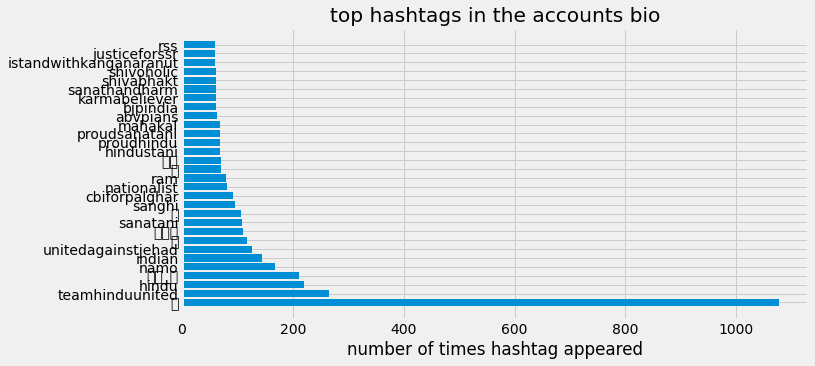

In [56]:
#visualize the top hashtags in the datasert
plt.figure(figsize=(30,20))
bar_chart(tags1.hashtags_user_descriptions, tags1.number, 'top hashtags in the accounts bio')

In [57]:
import re
df['hashtags_mention'] = df['tweet_text'].apply(lambda x: str(re.findall(r"@(\w+)", str(x))))
df['hashtags_mention'] = df['hashtags_mention'].apply(lambda x: ast.literal_eval(x))
type(df.iloc[0].hashtags_mention)

list

In [58]:
df['hashtags_mention'] = [str(i).lower() for i in df['hashtags_mention']]
df.head(5)

,created_at,tweet_id,tweet_text,favorite_count,retweet_count,screen_name,name,account_creation_date,location,user_description,user_verified,original_tweet_text,original_tweet_user_screen_name,original_tweet_user_location,original_tweet_user_description,original_tweet_user_created_at,original_user_account_created_at,created,month,account_creation_date_month,hashtags_user_descriptions,hashtags_tweet_text,hashtags_mention
0,2021-05-17 14:20:11,1394296692934025224,@mirad_a_l Bengal mein hinduon ko Marte waqt Twitter app nahin tha shayad aap logon k paas tab k...,0,0,abhishek4mrkl,Aran,2012-05-01,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-17,2021-05-01,2012-05-01,[],[],['mirad_a_l']
1,2021-05-17 14:17:50,1394296104494125056,"#PalestineBleedsWorldSleeps\n\nThe first thing we do, let's kill all the coward Muslim Leaders.\...",2,0,MlrKamran,Mlr KaMrAN,2021-04-02,Jammu And Kashmir,Happiness depends upon ourselves...!\nFrom:indian illegally occupied KASHMIR\nHeartbeat💖 PAKISTA...,False,NaN,NaN,NaN,NaN,NaN,NaN,2021-05-17,2021-05-01,2021-04-01,[],"['palestinebleedsworldsleeps', 'israelkillscivilians']",[]
2,2021-05-17 14:14:24,1394295240161259520,RT @Srushti53013875: #IndiaStandWithIsrael 🇮🇳❤🇮🇱Israel is facing same as India is facing #United...,0,12,dsnhnui,DS,2011-02-16,भारत,"I want corruption free INDIA, Justice, Uniform Law for all, Population Control.",False,#IndiaStandWithIsrael 🇮🇳❤🇮🇱Israel is facing same as India is facing #UnitedAgainstJehad #ISuppor...,Srushti53013875,"Maharashtra,India",Sanatan Dharm 🕉🕉\nधर्मो रक्षति रक्षितः 🚩🚩\nBharat Mata Ki Jai 🇮🇳🇮🇳\n#BeingHindu💪♥️💪 \nMarathi 😎\...,2021-05-13 09:50:25,2020-07-29 06:33:08,2021-05-17,2021-05-01,2011-02-01,[],"['indiastandwithisrael', 'unitedagainstjehad', 'isupportisrael']",['srushti53013875']
3,2021-05-17 14:09:29,1394294000434094082,"RT @Srikant32697299: After the #Violence, when you bring their fluffy face to everyone, then the...",0,46,Abhi_kas20,Abhishek,2021-02-13,"Ayodhya, India",अयोध्या 🛕\nसनातनी 🧡\nजय श्री राम🚩\nPharmacist💊,False,"After the #Violence, when you bring their fluffy face to everyone, then these people will play t...",Srikant32697299,"Puri, India",jai jagannath,2021-05-17 04:15:59,2020-03-26 06:04:13,2021-05-17,2021-05-01,2021-02-01,[],"['violence', 'victim']",['srikant32697299']
4,2021-05-17 14:04:04,1394292637574782977,"RT @Srikant32697299: After the #Violence, when you bring their fluffy face to everyone, then the...",0,46,Tynemouth2000,geoffrey mason,2017-10-07,Sunderland,NaN,False,"After the #Violence, when you bring their fluffy face to everyone, then these people will play t...",Srikant32697299,"Puri, India",jai jagannath,2021-05-17 04:15:59,2020-03-26 06:04:13,2021-05-17,2021-05-01,2017-10-01,[],"['violence', 'victim']",['srikant32697299']


In [16]:
df.to_csv('df.csv')

In [59]:
df['hashtags_mention'].value_counts().head(10)
type(df.iloc[0].hashtags_mention)

str

In [60]:
def hashing(col):
    
    col = col.apply(lambda x: ast.literal_eval(x))
    
    def mapper(s):
        all_vals = list()

        for l in s:
            [all_vals.append(x) for x in l]

        all_vals.sort()
        return all_vals

    def reducer(l):
        all_counts = dict()
        prev = l[0]
        count = 0

        for x in l:
            if x == prev:
                count = count + 1
            else:
                all_counts[prev] = count
                prev = x
                count = 1      

        all_counts[prev] = count

        return all_counts
    
    mapped = mapper(col)
    reduced = reducer(mapped)
    reduced = dict(sorted(reduced.items(), key=lambda x: x[1], reverse=True))
    
    df = pd.DataFrame(list(reduced.items()), columns=['hashtags_mention', 'number']).head(50).sort_values('number', ascending=False)
    return df

In [61]:
tags1 = hashing(df.hashtags_mention).head(20)
#.plot(kind='barh',x='hashtags_tweet_text',y='number', color ='green')

In [62]:
tags1

,hashtags_mention,number
0,randm_indianguy,10044
1,indianrightwing,4593
2,_spiritualgirl_,1807
3,ancient_bharath,1089
4,unitedhindu01,923
5,theanushcasm,777
6,trippyindian_,682
7,rachitthehindu,544
8,homidevang29,396
9,adarsh_0004,368
